***Importing modules***

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.regression.linear_model import OLS 

***Reading data***

In [131]:
raw_data = pd.read_csv('bigmart_data.csv')

In [132]:
df = raw_data.copy()

In [133]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [134]:
df.shape

(8523, 12)

***Preparing data***

In [135]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [136]:
df.dropna(how='any', inplace=True)

In [137]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [138]:
X = df.loc[:, ['Outlet_Establishment_Year', 'Item_MRP']]
y = df.loc[:, 'Item_Outlet_Sales']

In [139]:
X.head()

,Outlet_Establishment_Year,Item_MRP
0,1999,249.8092
1,2009,48.2692
2,1999,141.6180
4,1987,53.8614
5,2009,51.4008


In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

***Fitting the model***

In [141]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

***Predicting the data using Linear Regression***

In [142]:
pred = reg.predict(X_test)

***Calculating RMSE***

In [143]:
rmse = np.sqrt(mean_squared_error(y_test, pred))
rmse

1108.5449081627924

In [144]:
reg.score(X_test, y_test)

0.47065873074585574

***Calculating Co-efficients***

In [145]:
coeff = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficient'])
coeff

,Coefficient
Outlet_Establishment_Year,-8.671758
Item_MRP,16.146846


This indicates that MRP has a higher coefficient. Hence, items with higher MRP will be more profitable.

In [146]:
OLS_model = OLS(y_train, X_train).fit()
OLS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.838
Model:                            OLS   Adj. R-squared (uncentered):              0.838
Method:                 Least Squares   F-statistic:                              9636.
Date:                Thu, 09 Dec 2021   Prob (F-statistic):                        0.00
Time:                        22:55:31   Log-Likelihood:                         -31316.
No. Observations:                3720   AIC:                                  6.264e+04
Df Residuals:                    3718   BIC:                                  6.265e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Outlet_Establishment_Year    -0.0095      0.022     -0.425      0.671      -0.053       0.034
Item_MRP                     16.1526      0.287     56.304      0.000      15.590      16.715
==============================================================================
Omnibus:                      249.594   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              523.001
Skew:                           0.447   Prob(JB):                    2.70e-114
Kurtosis:                       4.604   Cond. No.                         32.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Trying with one more independent feature for prediction. We are dealing with only numerical features for now***

<AxesSubplot:>

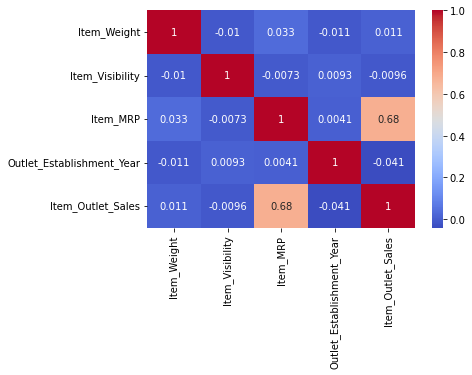

In [147]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [148]:
#Considering the correlation matrix, let us pick Item_weight in addition
X_3 = df.loc[:, ['Outlet_Establishment_Year', 'Item_MRP', 'Item_Weight']]
y_3 = df.loc[:, 'Item_Outlet_Sales']
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2, random_state=0)
reg_3 = LinearRegression()
reg_3.fit(X_train_3, y_train_3)
pred_3 = reg_3.predict(X_test_3)
rmse_3 = np.sqrt(mean_squared_error(y_test_3, pred_3))
rmse_3

1110.006863395453

In [149]:
reg_3.score(X_test_3, y_test_3)

0.4692616136296661

In [150]:
OLS_3 = OLS(y_train_3, X_train_3).fit()
OLS_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.838
Model:                            OLS   Adj. R-squared (uncentered):              0.838
Method:                 Least Squares   F-statistic:                              6428.
Date:                Thu, 09 Dec 2021   Prob (F-statistic):                        0.00
Time:                        22:55:31   Log-Likelihood:                         -31314.
No. Observations:                3720   AIC:                                  6.263e+04
Df Residuals:                    3717   BIC:                                  6.265e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Outlet_Establishment_Year     0.0311      0.033      0.947      0.344      -0.033       0.095
Item_MRP                     16.1714      0.287     56.341      0.000      15.609      16.734
Item_Weight                  -6.5188      3.867     -1.686      0.092     -14.100       1.062
==============================================================================
Omnibus:                      249.128   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              523.978
Skew:                           0.445   Prob(JB):                    1.66e-114
Kurtosis:                       4.608   Cond. No.                         431.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There is not much difference in RMSE even after adding the new feature. But the score is reduced. As we add more predictors, we need to measure Adj. R-Squared.

***Trying with all features***

In [151]:
# Data preprocessing in other features
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4650 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            4650 non-null   object 
 1   Item_Weight                4650 non-null   float64
 2   Item_Fat_Content           4650 non-null   object 
 3   Item_Visibility            4650 non-null   float64
 4   Item_Type                  4650 non-null   object 
 5   Item_MRP                   4650 non-null   float64
 6   Outlet_Identifier          4650 non-null   object 
 7   Outlet_Establishment_Year  4650 non-null   int64  
 8   Outlet_Size                4650 non-null   object 
 9   Outlet_Location_Type       4650 non-null   object 
 10  Outlet_Type                4650 non-null   object 
 11  Item_Outlet_Sales          4650 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 472.3+ KB


In [153]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'reg', 'LF'], dtype=object)

In [154]:
df.Item_Fat_Content = df.Item_Fat_Content.map({'Low Fat': 0, 'Regular': 1, 
                                               'low fat': 0, 'reg': 1, 'LF': 0})

In [155]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,1,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4650 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            4650 non-null   object 
 1   Item_Weight                4650 non-null   float64
 2   Item_Fat_Content           4650 non-null   int64  
 3   Item_Visibility            4650 non-null   float64
 4   Item_Type                  4650 non-null   object 
 5   Item_MRP                   4650 non-null   float64
 6   Outlet_Identifier          4650 non-null   object 
 7   Outlet_Establishment_Year  4650 non-null   int64  
 8   Outlet_Size                4650 non-null   object 
 9   Outlet_Location_Type       4650 non-null   object 
 10  Outlet_Type                4650 non-null   object 
 11  Item_Outlet_Sales          4650 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 472.3+ KB


In [157]:
df.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Household', 'Baking Goods',
       'Snack Foods', 'Fruits and Vegetables', 'Breakfast',
       'Health and Hygiene', 'Frozen Foods', 'Hard Drinks', 'Canned',
       'Starchy Foods', 'Breads', 'Others', 'Seafood'], dtype=object)

In [158]:
df.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [159]:
df.Outlet_Location_Type = df.Outlet_Location_Type.map({'Tier 1': 1, 'Tier 2': 2, 'Tier 3': 3})
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,1,Supermarket Type1,3735.1380
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,3,Supermarket Type2,443.4228
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1999,Medium,1,Supermarket Type1,2097.2700
4,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,1987,High,3,Supermarket Type1,994.7052
5,FDP36,10.395,1,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,3,Supermarket Type2,556.6088


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4650 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            4650 non-null   object 
 1   Item_Weight                4650 non-null   float64
 2   Item_Fat_Content           4650 non-null   int64  
 3   Item_Visibility            4650 non-null   float64
 4   Item_Type                  4650 non-null   object 
 5   Item_MRP                   4650 non-null   float64
 6   Outlet_Identifier          4650 non-null   object 
 7   Outlet_Establishment_Year  4650 non-null   int64  
 8   Outlet_Size                4650 non-null   object 
 9   Outlet_Location_Type       4650 non-null   int64  
 10  Outlet_Type                4650 non-null   object 
 11  Item_Outlet_Sales          4650 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 472.3+ KB


In [161]:
df.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2'], dtype=object)

In [162]:
df.Outlet_Type = df.Outlet_Type.map({'Supermarket Type1': 1, 'Supermarket Type2': 2})
df.head()        

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,1,1,3735.1380
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,3,2,443.4228
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1999,Medium,1,1,2097.2700
4,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,1987,High,3,1,994.7052
5,FDP36,10.395,1,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,3,2,556.6088


In [163]:
df.Outlet_Size.unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [164]:
df.Outlet_Size = df.Outlet_Size.map({'Small': 1, 'Medium': 2, 'High': 3})
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,2,1,1,3735.1380
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,2,3,2,443.4228
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1999,2,1,1,2097.2700
4,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,1987,3,3,1,994.7052
5,FDP36,10.395,1,0.000000,Baking Goods,51.4008,OUT018,2009,2,3,2,556.6088


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4650 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            4650 non-null   object 
 1   Item_Weight                4650 non-null   float64
 2   Item_Fat_Content           4650 non-null   int64  
 3   Item_Visibility            4650 non-null   float64
 4   Item_Type                  4650 non-null   object 
 5   Item_MRP                   4650 non-null   float64
 6   Outlet_Identifier          4650 non-null   object 
 7   Outlet_Establishment_Year  4650 non-null   int64  
 8   Outlet_Size                4650 non-null   int64  
 9   Outlet_Location_Type       4650 non-null   int64  
 10  Outlet_Type                4650 non-null   int64  
 11  Item_Outlet_Sales          4650 non-null   float64
dtypes: float64(4), int64(5), object(3)
memory usage: 472.3+ KB


In [166]:
#Let us remove Idenfier features for now
df = df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4650 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                4650 non-null   float64
 1   Item_Fat_Content           4650 non-null   int64  
 2   Item_Visibility            4650 non-null   float64
 3   Item_Type                  4650 non-null   object 
 4   Item_MRP                   4650 non-null   float64
 5   Outlet_Establishment_Year  4650 non-null   int64  
 6   Outlet_Size                4650 non-null   int64  
 7   Outlet_Location_Type       4650 non-null   int64  
 8   Outlet_Type                4650 non-null   int64  
 9   Item_Outlet_Sales          4650 non-null   float64
dtypes: float64(4), int64(5), object(1)
memory usage: 399.6+ KB


In [175]:
#Only left feature in Item_Type. As there are more unique values here, let us use pd.get_dummies instead of manually updating them
df_dummies = pd.get_dummies(df.Item_Type, prefix='Item_Type')

In [176]:
df_dummies.shape

(4650, 16)

In [177]:
df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [178]:
df = pd.concat([df, df_dummies], axis=1)

In [179]:
df.shape

(4650, 26)

In [180]:
df.isnull().sum()

Item_Weight                        0
Item_Fat_Content                   0
Item_Visibility                    0
Item_Type                          0
Item_MRP                           0
Outlet_Establishment_Year          0
Outlet_Size                        0
Outlet_Location_Type               0
Outlet_Type                        0
Item_Outlet_Sales                  0
Item_Type_Baking Goods             0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
dtype: int64

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4650 entries, 0 to 8522
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      4650 non-null   float64
 1   Item_Fat_Content                 4650 non-null   int64  
 2   Item_Visibility                  4650 non-null   float64
 3   Item_Type                        4650 non-null   object 
 4   Item_MRP                         4650 non-null   float64
 5   Outlet_Establishment_Year        4650 non-null   int64  
 6   Outlet_Size                      4650 non-null   int64  
 7   Outlet_Location_Type             4650 non-null   int64  
 8   Outlet_Type                      4650 non-null   int64  
 9   Item_Outlet_Sales                4650 non-null   float64
 10  Item_Type_Baking Goods           4650 non-null   uint8  
 11  Item_Type_Breads                 4650 non-null   uint8  
 12  Item_Type_Breakfast 

In [185]:
df.drop(['Item_Type'], axis=1, inplace=True)

***Splitting the data, Fitting and predicting using the model***

In [186]:
X_all = df.loc[:, df.columns != 'Item_Outlet_Sales']
y_all = df.loc[:, 'Item_Outlet_Sales']

In [187]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=0)

In [188]:
reg_all = LinearRegression()
reg_all.fit(X_train_all, y_train_all)
pred_all = reg_all.predict(X_test_all)
reg_score = reg_all.score(X_test_all, y_test_all)
print("Score: ", reg_score)
rmse_all = np.sqrt(mean_squared_error(y_test_all, pred_all))
print("RMSE: ", rmse_all)

Score:  0.4703595240526319
RMSE:  1108.858162785287


In [189]:
OLS_all = OLS(y_train_all, X_train_all).fit()
OLS_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     144.1
Date:                Thu, 09 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:04:44   Log-Likelihood:                -31271.
No. Observations:                3720   AIC:                         6.259e+04
Df Residuals:                    3696   BIC:                         6.274e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Item_Weight                        -6.4482      3.866     -1.668      0.095     -14.027       1.131
Item_Fat_Content                  -13.3659     41.193     -0.324      0.746     -94.129      67.397
Item_Visibility                  -476.0448    403.579     -1.180      0.238   -1267.305     315.216
Item_MRP                           16.1872      0.286     56.568      0.000      15.626      16.748
Outlet_Establishment_Year          17.0523      6.047      2.820      0.005       5.197      28.907
Outlet_Size                        72.6908     46.918      1.549      0.121     -19.296     164.678
Outlet_Location_Type               16.7980     31.496      0.533      0.594     -44.952      78.548
Outlet_Type                      -608.5837    104.725     -5.811      0.000    -813.908    -403.260
Item_Type_Baking Goods          -3.344e+04   1.21e+04     -2.774      0.006   -5.71e+04   -9805.181
Item_Type_Breads                -3.329e+04   1.21e+04     -2.761      0.006   -5.69e+04   -9655.166
Item_Type_Breakfast             -3.346e+04   1.21e+04     -2.775      0.006   -5.71e+04   -9818.568
Item_Type_Canned                -3.344e+04   1.21e+04     -2.774      0.006   -5.71e+04   -9804.623
Item_Type_Dairy                  -3.35e+04   1.21e+04     -2.779      0.005   -5.71e+04   -9864.108
Item_Type_Frozen Foods          -3.344e+04   1.21e+04     -2.774      0.006   -5.71e+04   -9802.164
Item_Type_Fruits and Vegetables -3.343e+04   1.21e+04     -2.773      0.006   -5.71e+04   -9794.257
Item_Type_Hard Drinks           -3.345e+04   1.21e+04     -2.774      0.006   -5.71e+04   -9811.424
Item_Type_Health and Hygiene    -3.338e+04   1.21e+04     -2.769      0.006    -5.7e+04   -9742.783
Item_Type_Household             -3.346e+04   1.21e+04     -2.776      0.006   -5.71e+04   -9824.783
Item_Type_Meat                  -3.344e+04   1.21e+04     -2.774      0.006   -5.71e+04   -9807.368
Item_Type_Others                -3.342e+04   1.21e+04     -2.772      0.006   -5.71e+04   -9784.072
Item_Type_Seafood               -3.293e+04   1.21e+04     -2.731      0.006   -5.66e+04   -9289.898
Item_Type_Snack Foods           -3.341e+04   1.21e+04     -2.771      0.006   -5.71e+04   -9775.549
Item_Type_Soft Drinks           -3.349e+04   1.21e+04     -2.777      0.006   -5.71e+04   -9848.099
Item_Type_Starchy Foods         -3.338e+04   1.21e+04     -2.769      0.006    -5.7e+04   -9743.339
==============================================================================
Omnibus:                      250.509   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              535.449
Skew:                           0.443   Prob(JB):                    5.35e-117
Kurtosis:                       4.634   Cond. No.                  

In [190]:
predictors = X_train_all.columns
coeff_all = pd.DataFrame(reg_all.coef_, predictors, columns=['Coefficient'])
coeff_all

,Coefficient
Item_Weight,-6.448164
Item_Fat_Content,-13.365908
Item_Visibility,-476.044789
Item_MRP,16.187242
Outlet_Establishment_Year,17.052323
Outlet_Size,72.690758
Outlet_Location_Type,16.797999
Outlet_Type,-608.583711
Item_Type_Baking Goods,-42.270318
Item_Type_Breads,103.298862


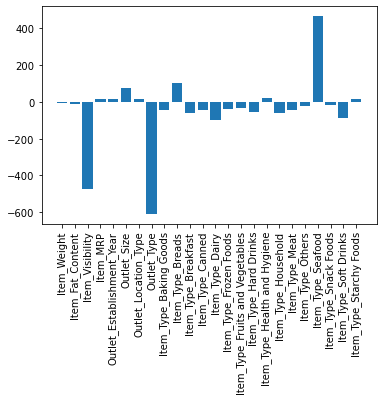

In [193]:
plt.bar(predictors, reg_all.coef_)
plt.xticks(rotation=90)
plt.show()

Considering the coefficients, we can say Seafood is the most profitable category.